# 250 Bird Species Image Classification

In [12]:
!pip install jovian --upgrade --quiet

Let's begin by installing and importing the required libraries.

In [13]:
# Uncomment and run the appropriate command for your operating system, if required
# No installation is reqiured on Google Colab / Kaggle notebooks

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
 
# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

In [14]:
!pip install opendatasets --upgrade --quiet

In [15]:
import opendatasets as od

In [16]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [17]:
from PIL import Image
from pathlib import Path
import pandas as pd
import math
import cv2
from scipy import signal

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import plot_model
import seaborn as sns

In [19]:
project_name='vivek-deep-learning-project'

In [20]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/vivekkumarprajapati93/vivek-deep-learning-project


'https://jovian.ai/vivekkumarprajapati93/vivek-deep-learning-project'

In [21]:
from torchvision.datasets.utils import download_url

# Download the 250 Birds Species dataset
dataset_url = 'https://www.kaggle.com/gpiosenka/100-bird-species/download'
od.download(dataset_url)
 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prajavivek
Your Kaggle Key: ··········


  0%|          | 0.00/1.54G [00:00<?, ?B/s]

100%|██████████| 1.54G/1.54G [00:16<00:00, 102MB/s] 


# Preparing the 250 Bird Species Dataset


Data set of 250 bird species. 35215 training images, 1250 test images(5 per species) and 12500 validation images(5 per species.
All images are 224 X 224 X 3 color images in jpg format. Also includes a "consolidated" image set that combines the training, test and validation images into a single data set.

In [23]:
print(os.listdir('.'))

['.config', '100-bird-species', 'sample_data']


In [24]:
# Look into the 250 Birds Species data directory
data_dir = './100-bird-species'
print(os.listdir(data_dir))

['train', 'valid', 'consolidated', 'test']


In [25]:
classes = os.listdir(data_dir + "/train")
print(len(classes))
print(classes)

250
['KOOKABURRA', 'ASIAN CRESTED IBIS', 'ALEXANDRINE PARAKEET', 'GOLDEN CHEEKED WARBLER', 'BLACK-NECKED GREBE', 'ALBATROSS', 'OSPREY', 'SUPERB STARLING', 'HELMET VANGA', 'D-ARNAUDS BARBET', 'GOLDEN PIPIT', 'PAINTED BUNTIG', 'RED WISKERED BULBUL', 'SAMATRAN THRUSH', 'CHIPPING SPARROW', 'MANDRIN DUCK', 'MALLARD DUCK', 'FLAME TANAGER', 'SRI LANKA BLUE MAGPIE', 'BROWN NOODY', 'NORTHERN GOSHAWK', 'COCKATOO', 'CRESTED AUKLET', 'RED HEADED DUCK', 'CURL CRESTED ARACURI', 'MYNA', 'MALABAR HORNBILL', 'LONG-EARED OWL', 'GILDED FLICKER', 'COUCHS KINGBIRD', 'WOOD DUCK', 'CALIFORNIA GULL', 'FRIGATE', 'COMMON STARLING', 'RAINBOW LORIKEET', 'ROUGH LEG BUZZARD', 'ELLIOTS  PHEASANT', 'WATTLED CURASSOW', 'PARADISE TANAGER', 'CRESTED CARACARA', 'BLACK-CAPPED CHICKADEE', 'KILLDEAR', 'CUBAN TODY', 'GRAY PARTRIDGE', 'PALILA', 'YELLOW HEADED BLACKBIRD', 'CAPE MAY WARBLER', 'CROW', 'HARPY EAGLE', 'GREAT POTOO', 'ANHINGA', 'INCA TERN', 'INDIGO BUNTING', 'JAVA SPARROW', 'NORTHERN CARDINAL', 'GRAY CATBIRD', 'BAR

Let's look inside a couple of folders, one from the training set and another from the test set. As an analytic exploration, I can also verify the number of images for each class in the training set as well as in the test set.

In [26]:
SORA_files = os.listdir(data_dir + "/train/SORA")
print('No. of training examples for Bobolink:', len(SORA_files))
print(SORA_files[:10])

No. of training examples for Bobolink: 300
['068.jpg', '201.jpg', '283.jpg', '170.jpg', '120.jpg', '277.jpg', '188.jpg', '036.jpg', '258.jpg', '150.jpg']


In [27]:
baldEagle_test_files = os.listdir(data_dir + "/test/BALD EAGLE")
print("No. of test examples for ship:", len(baldEagle_test_files))
print(baldEagle_test_files[:5])

No. of test examples for ship: 5
['1.jpg', '3.jpg', '2.jpg', '5.jpg', '4.jpg']


In [28]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Exploring the Data

I also loop through the 250 Bird Species Dataset to determine the number of images belonging to each class as follows:

In [29]:
for cls in classes:
  train_images = os.listdir(data_dir + '/train/' + cls)
  img_count = len(train_images)
  print("Number of images belonging to {} is {}".format(cls, img_count))

Number of images belonging to KOOKABURRA is 143
Number of images belonging to ASIAN CRESTED IBIS is 105
Number of images belonging to ALEXANDRINE PARAKEET is 165
Number of images belonging to GOLDEN CHEEKED WARBLER is 176
Number of images belonging to BLACK-NECKED GREBE is 105
Number of images belonging to ALBATROSS is 133
Number of images belonging to OSPREY is 127
Number of images belonging to SUPERB STARLING is 144
Number of images belonging to HELMET VANGA is 107
Number of images belonging to D-ARNAUDS BARBET is 233
Number of images belonging to GOLDEN PIPIT is 113
Number of images belonging to PAINTED BUNTIG is 163
Number of images belonging to RED WISKERED BULBUL is 123
Number of images belonging to SAMATRAN THRUSH is 128
Number of images belonging to CHIPPING SPARROW is 115
Number of images belonging to MANDRIN DUCK is 130
Number of images belonging to MALLARD DUCK is 135
Number of images belonging to FLAME TANAGER is 177
Number of images belonging to SRI LANKA BLUE MAGPIE is 16

### Dataset Directory Assignment

In [30]:
data_dir = './100-bird-species'
train_directory= data_dir + '/train'
test_directory= data_dir + '/test'
val_directory= data_dir + '/valid'

### Image Rescaling

In [31]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

### Image Reading Using the flow from directory function

In [32]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                  batch_size=256,
                                                 class_mode='sparse')
val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 batch_size=256,
                                                 color_mode='rgb',
                                                 class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_directory,
                                                batch_size=256,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse')

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


### Building Dictionary of Bird Species Classes

In [33]:
num_classes=(len(train_generator.class_indices))
print(num_classes)

250


In [34]:
train_generator.class_indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALI STARLING': 17,
 'BALTIMORE ORIOLE': 18,
 'BANANAQUIT': 19,
 'BANDED BROADBILL': 20,
 'BAR-TAILED GODWIT': 21,
 'BARN OWL': 22,
 'BARN SWALLOW': 23,
 'BARRED PUFFBIRD': 24,
 'BAY-BREASTED WARBLER': 25,
 'BEARDED BARBET': 26,
 'BELTED KINGFISHER': 27,
 'BIRD OF PARADISE': 28,
 'BLACK FRANCOLIN': 29,
 'BLACK SKIMMER': 30,
 'BLACK SWAN': 31,
 'BLACK THROATED WARBLER': 32,
 'BLACK VULTURE': 33,
 'BLACK-CAPPED CHICKADEE': 34,
 'BLACK-NECKED GREBE': 35,
 'BLACK-THROATED SPARROW': 36,
 'BLACKBURNIAM WARBLER': 37,
 'BLUE GROUSE': 38,
 'BLUE HERON': 39,
 'BOBOLINK': 40,
 'BROWN NOODY': 41,
 'BROWN THRAS

### Data Insight Through Plotting Distribution Graphs

In [35]:
breeds=list(train_generator.class_indices.keys())

In [36]:
x=list(train_generator.classes)

In [37]:
label=[]
for i in range (0, num_classes):
    label.append(x.count(i))

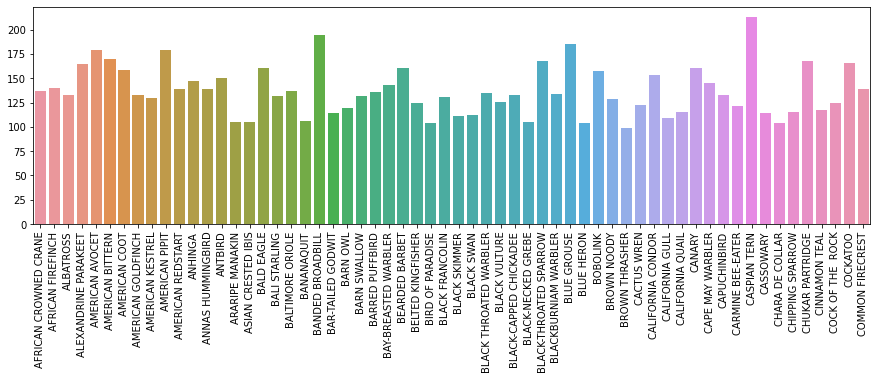

In [38]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[:60],y=label[:60])
plt.xticks(rotation=90)
plt.show()

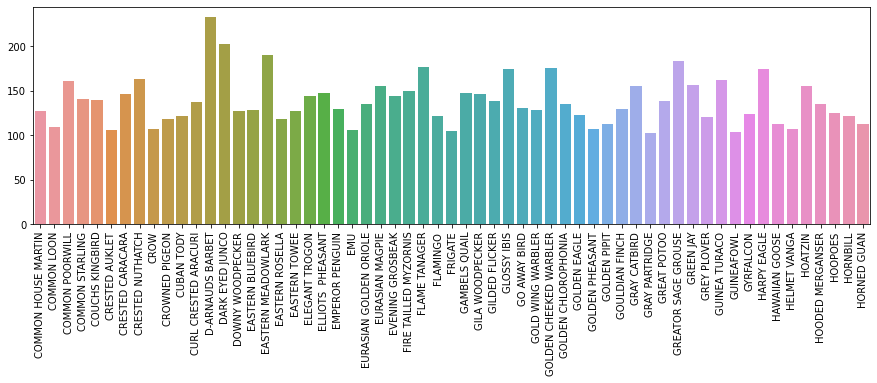

In [39]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[61:120],y=label[61:120])
plt.xticks(rotation=90)
plt.show()

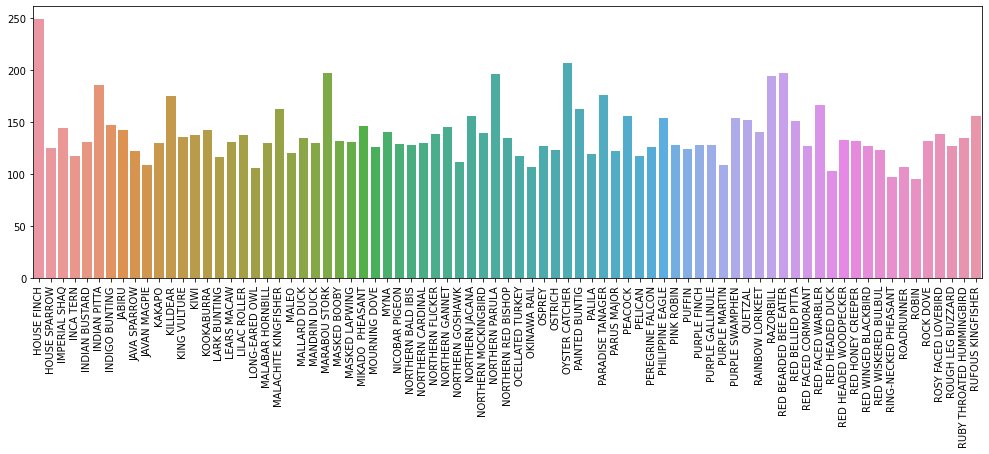

In [40]:
fig_dims = (17, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[121:200],y=label[121:200])
plt.xticks(rotation=90)
plt.show()

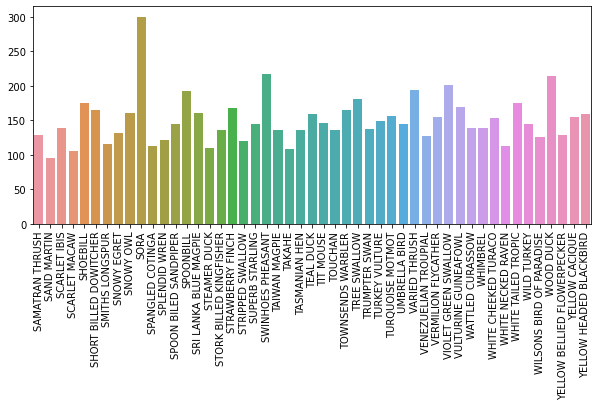

In [41]:

fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=breeds[201:],y=label[201:])
plt.xticks(rotation=90)
plt.show()

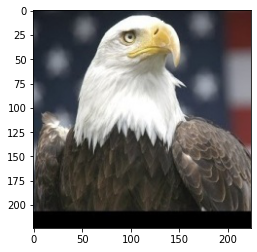

In [42]:
image1 = np.array(Image.open('./100-bird-species/train/BALD EAGLE/122.jpg'))
plt.imshow(image1, cmap='gray')

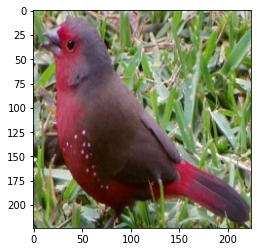

In [43]:
image2 = np.array(Image.open('./100-bird-species/train/AFRICAN FIREFINCH/005.jpg'))
plt.imshow(image2, cmap='gray')

In [44]:
np.array(image2).shape

(224, 224, 3)

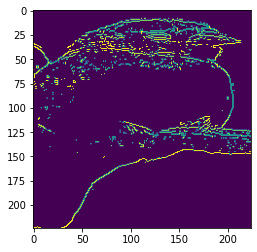

In [45]:
image2_1 = np.array(Image.open('./100-bird-species/train/AFRICAN FIREFINCH/002.jpg'))  
image2_1 = cv2.Canny(image2_1,224,224)
plt.imshow(image2_1)

I create training and validation datasets using the ImageFolder class from torchvision. In addition to the ToTensor transform, I also apply some other transforms to the images. The following changes are a few improvement changes I make while creating PyTorch datasets for training and validation:

1) **Channel-wise data normalization**

2) **Randomized data augmentations**

In [46]:

image_size = 32

In [47]:

# Data transforms (normalization & data augmentation) # tt.RandomCrop(64, padding=4, padding_mode='reflect')
stats = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
train_tfms = tt.Compose([tt.Resize((image_size, image_size)),
                         tt.RandomCrop(image_size, padding=4, padding_mode='reflect'),
                         #tt.Resize(image_size),
                         #tt.CenterCrop(image_size), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((image_size, image_size)), tt.ToTensor(), tt.Normalize(*stats)])

test_tfms = tt.Compose([tt.Resize((image_size, image_size)), tt.ToTensor(), tt.Normalize(*stats)])

In [48]:
# PyTorch Training & Validation & Test Datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/valid', valid_tfms)
test_ds = ImageFolder(data_dir+'/test', test_tfms)

Next, we can create data loaders for retrieving images in batches. I will use a relatively large batch size of 400 to utlize a larger portion of the GPU RAM. The, I try reducing the batch size & restarting the kernel if I face an "out of memory" error.

In [49]:
batch_size = 400

In [50]:
# PyTorch Training & Validation & Test Data Loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=3, pin_memory=True)

Let's take a look at some sample images from the training dataloader. To display the images, I need to denormalize the pixels values to bring them back into the range (0,1).

In [51]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

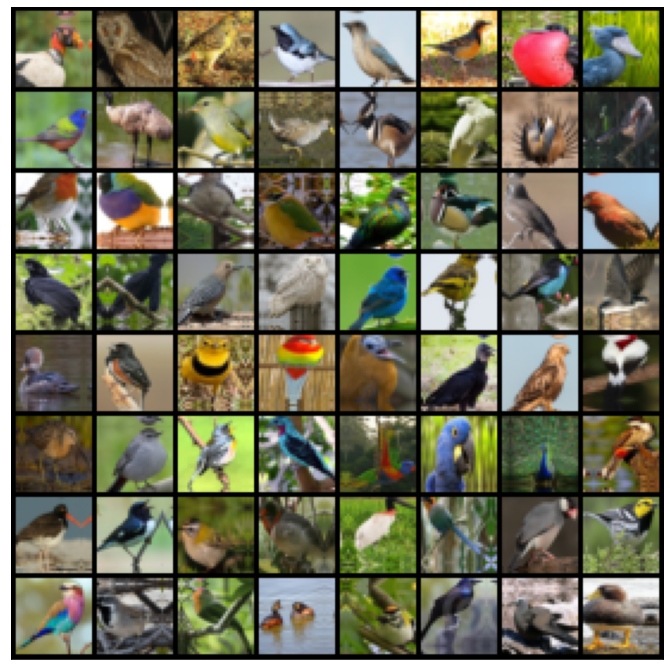

In [52]:

show_batch(train_dl)

The colors seem out of place because of the normalization. Note that normalization is also applied during inference. When looking closely, I can spot the cropping and reflection padding in some of the images. Horizontal flip is a bit difficult to detect from visual inspection.

## Utilizing GPU

To seamlessly use a GPU, if one is available, I define a couple of helper functions (`get_default_device` & `to_device`) besides a helper class `DeviceDataLoader` to move my model & data to the GPU as required. 

In [53]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where this notebook is being run, the default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [54]:
device = get_default_device()
device

device(type='cuda')

I wrap my training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [55]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

## Modeling Definition (Network Architecture)

### Model with Residual Blocks and Batch Normalization

One of the applied improvements to the Convolutional Neural Network (CNN) model is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

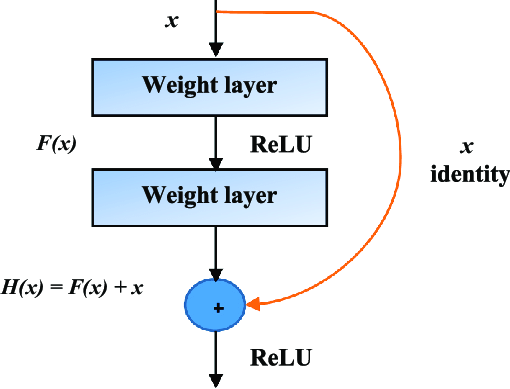

Here is the implementation of the very simple Residual block:

In [56]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [57]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


Addition of the resudial block produces a significant improvement in the performance of the model. Also, after each convolutional layer, I add a batch normalization layer, which normalizes the outputs of the previous layer.

I utilize the ResNet9 architecture, as demonstrated below:
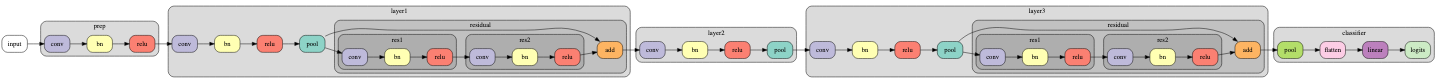

In [58]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

Now I develop the ResNet9 model through extending the `ImageClassificationBase` model besides defining a `conv_block` containing the Convolutional Block as the building block of the aforementioned architecture.

In [59]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64) # batch_size * [64 * 32 *32]
        self.conv2 = conv_block(64, 128, pool=True) # batch_size * [128 * 16 * 16]
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # batch_size * [128 * 16 * 16]
        
        self.conv3 = conv_block(128, 256, pool=True) # batch_size * [256 * 8 * 8]
        self.conv4 = conv_block(256, 512, pool=True) # batch_size * [512 * 4 * 4]
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) # batch_size * [512 * 4 * 4]
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), # batch_size * [512 * 1 * 1]
                                        nn.Flatten(), # batch_size * [512]
                                        nn.Dropout(0.2), # (0.2*batch_size) * [512]
                                        nn.Linear(512, num_classes)) # (0.2*batch_size) * [3]
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [60]:
model = to_device(ResNet9(3, 250), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### Hidden Layers:

(64, 128, 128, 128, 256, 512, 512, 512, 250)

## Model Training

Before starting to train the model, I apply a number of small but important improvements to my fit function:

**Learning Rate Scheduling:** Instead of using a fixed learning rate, I deploy a Learning Rate Scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one I use is called the "**One Cycle Learning Rate Policy**", which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs.

**Reference**: https://sgugger.github.io/the-1cycle-policy.html

**Weight Decay**: I also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.

**Reference**: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

**Gradient Clipping**: Aside from the layer weights and outputs, it is also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called Gradient Clipping. 

**Reference**: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48

To that aim, I define a `fit_one_cycle` function to incorporate the above-mentioned changes. I also record the learning rate used for each batch.

In [61]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before I begin training, I evaluate the instantiated model in order to see how it performs on the validation set with the initial set of parameters.



In [62]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.0031250000465661287, 'val_loss': 5.523530006408691}]

The initial accuracy is around 0.4%, which is what one would naturally anticipat from a randomly intialized model (since it has a (1/250)*100 ~ 0.4% chance of getting a label right by guessing randomly out of 250 possible outcome).

I use the following hyperparmeters (learning rate, no. of epochs, batch_size etc.) to train my ResNet9 model architecture. Further down the training path, I play with these parameters to see whether is possible to achieve a higher accuracy in a shorter time.

In [63]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   50511 KB |    2010 MB |   11188 MB |   11139 MB |\n|       from large pool |   48512 KB |    2008 MB |   11183 MB |   11136 MB |\n|       from small pool |    1999 KB |       3 MB |       5 MB |       3 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |   50511 KB |    2010 MB |   11188 MB |   11139 MB |\n|       from large pool |   48512 KB |    2008 MB |

Now all is prepared to train the ResNet9 model. Instead of SGD (Stochastic Gradient Descent), I use the Adam optimizer which leverages techniques like momentum and adaptive learning rates for faster training. I utilized the following resource as reference:

Optimizers Reference: https://ruder.io/optimizing-gradient-descent/index.html

In [64]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [65]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00277, train_loss: 4.9222, val_loss: 4.8043, val_acc: 0.0894
Epoch [1], last_lr: 0.00758, train_loss: 3.8325, val_loss: 5.7496, val_acc: 0.1026
Epoch [2], last_lr: 0.01000, train_loss: 3.0340, val_loss: 7.2715, val_acc: 0.0720
Epoch [3], last_lr: 0.00950, train_loss: 2.3497, val_loss: 2.1943, val_acc: 0.4649
Epoch [4], last_lr: 0.00812, train_loss: 1.7420, val_loss: 1.2248, val_acc: 0.6831
Epoch [5], last_lr: 0.00611, train_loss: 1.4120, val_loss: 1.1878, val_acc: 0.7051
Epoch [6], last_lr: 0.00389, train_loss: 1.2290, val_loss: 0.6549, val_acc: 0.8317
Epoch [7], last_lr: 0.00188, train_loss: 0.9351, val_loss: 0.4638, val_acc: 0.8833
Epoch [8], last_lr: 0.00050, train_loss: 0.7091, val_loss: 0.4055, val_acc: 0.9040
Epoch [9], last_lr: 0.00000, train_loss: 0.6014, val_loss: 0.3764, val_acc: 0.9026
CPU times: user 30.3 s, sys: 14.7 s, total: 44.9 s
Wall time: 8min 27s


In [66]:
# train_time_1='10:22'
# train_time_2='8:49'
train_time_3='8:18'

My `ResNet9 model architecture` with First trial of the hyperparameters achieved about `90% accuracy` within just `10 minutes of training`! 

Next, I try tweaking variables associated with the data augmentations, network architecture & hyperparameters to see whether it is possible to chase better values for "**Model Accuracy**" as well as "**Model Loss**" within less amount of training time as follows.


## Model Accuracy and Loss Plots

Plot the Model Losses and Accuracies to check if I am starting to hit the limits of how well my ResNet9 model architecture is able to perform on this 250 Bird Species Dataset. Built on this, I initiate a number of more training to check whether I can see the scope for further improvement.

In [67]:
from matplotlib import spines
from matplotlib import axes

In [68]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
# plt.style.use('dark_background')
# matplotlib.spines[axis].set_color(color) 
# matplotlib.spines["bottom"].set_color("red")
# matplotlib.spines["left"].set_color("orange")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('red')
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'})

In [69]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-bx')
    plt.xlabel('epoch', color='C0')
    plt.ylabel('accuracy', color='C0')
    plt.title('Accuracy vs. No. of epochs', color='C0');

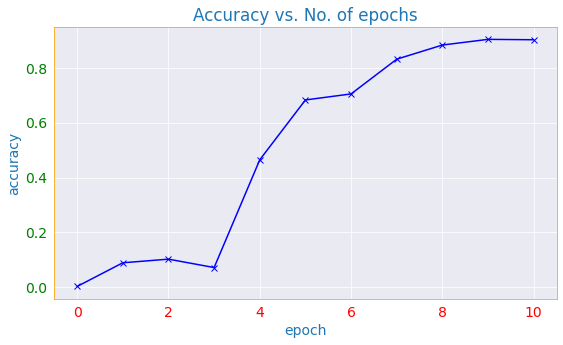

In [70]:
plot_accuracies(history)

I also plot the Model Training and Validation Losses to investigate the training trend further down the improvement path.

In [71]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch', color='C0')
    plt.ylabel('loss', color='C0')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs', color='C0');

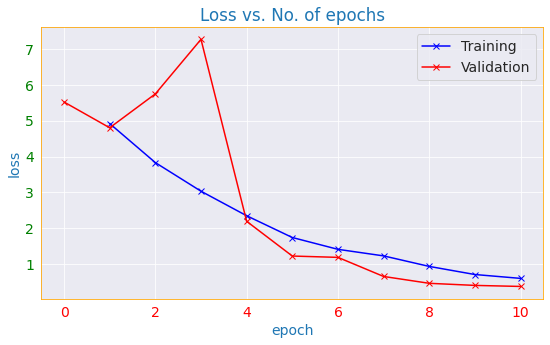

In [72]:
plot_losses(history)

As evident from the above trend, my ResNet9 model is not yet suffering from overfitting to the training data. I tried removing Batch Normalization, Data Augmentation and Residual Layers one by one to analyze their individual effect on overfitting phenomenon.

Finally, I visualize how the `One Cycle Learning Rate Scheduler` is unfolding over time, batch-by-batch over all the epochs.

In [73]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs, 'C11-')
    plt.xlabel('Batch No.', color='C0')
    plt.ylabel('One Cycle Learning Rate Scheduler', color='C0')
    plt.title('One Cycle Learning Rate Scheduler vs. Batch No.', color='C0');

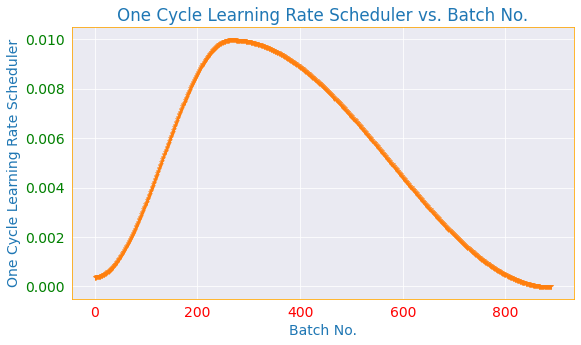

In [74]:
plot_lrs(history)

As anticipated, the `One Cycle Learning Rate Scheduler` starts at a low value, and gradually increases for 30% of the iterations to a defined maximum value of 0.01, followed by gradually decreasing to a very small value.

## Record Experiment Model Performance on Test Dataset 

Finally, I evaluate the model on the Test Dataset of 250 Bird Species and report its final performance in each experiment for record.

In [75]:
evaluate(model, test_dl)

{'val_acc': 0.9161805510520935, 'val_loss': 0.3181477189064026}

## Improvement Strategy Algorithm:



Are thesee results are in line with the Accuracy & Loss Requirements? 

Record my Accuracy, Loss and other Performance Metrics results in each experiment by completing the section below so that I can come back for referral and try a different architecture & hyperparameters.

I need to try different network architectures (#hidden layers, size of each hidden layer, activation function) and hyperparameters (#epochs, LR) in so far as I can chase the desired Model Test Loss & Accuracy.

`Experiment#1`: Start with the initial size of the Nine `Hidden Layers: (64, 128, 128, 128, 256, 512, 512, 512, 250)`, resulting in the initial Model Accuracy of `{'val_acc': 0.916}` and the initial Model Loss of `{'val_loss': 0.297}` under Training Time of `train_time_1='10:22'`.

`Experiment#2`: Doubling the `batch_size from 32 to 64` to utlize a larger portion of the GPU RAM while keeping the rest of the hyperparameters unchanged, resulted in slight improvement in Training Time and Performance such that it nudged up the Model Accuracy from `{'val_acc': 0.916}` up to `{'val_acc': 0.929}` and dampened the Model Loss from `{'val_loss': 0.297}` down to `{'val_loss': 0.239}` under yet lesser Training Time of `train_time_2='8:49'`.

Experiment#3: This time, however, increasing the `batch_size from 64 to 400` to utlize even a larger portion of the GPU RAM while keeping the rest of the hyperparameters unchanged, did not result in Performance improvement as it dampened the Model Accuracy from `{'val_acc': 0.929}` down to `{'val_acc': 0.915}` and raised the Model Loss slightly from `{'val_loss': 0.239}` up to `{'val_loss': 0.325}` under even lesser Training Time of `train_time_3='8:18'`.




## Testing with individual Test Datasets images

While I have been tracking the overall accuracy of a model so far, it is also a good idea to look at the `model's performance on some sample test images`. Let's test out my model with some sample images from the predefined `Test Dataset of 1250 Test images (5 per species)`.

In [76]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: AFRICAN CROWNED CRANE , Predicted: AFRICAN CROWNED CRANE


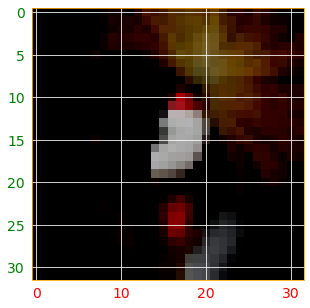

In [77]:
# Image Test#1 (With Clamping)
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: MALACHITE KINGFISHER , Predicted: MALACHITE KINGFISHER


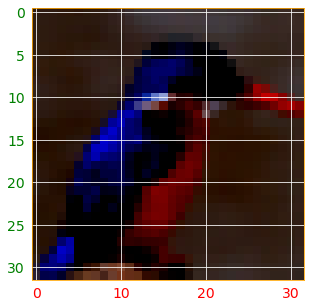

In [78]:
# Image Test#2 (With Clamping)
img, label = test_ds[707]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: WILD TURKEY , Predicted: WILD TURKEY


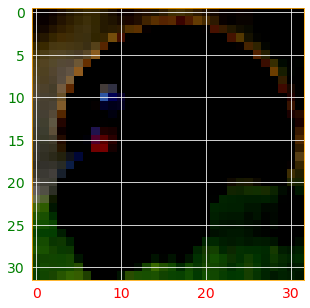

In [79]:
# Image Test#3 (With Clamping)
img, label = test_ds[1222]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: RUFOUS KINGFISHER , Predicted: RUFOUS KINGFISHER


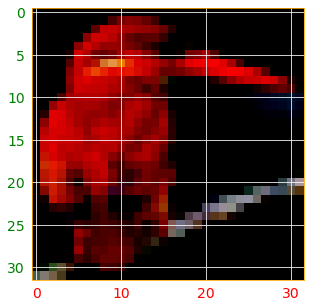

In [80]:
# Image Test#4 (Withour Clamping)
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
img, label = test_ds[999]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Identifying where the chosen model architecture performs poorly can help the designer improve the model, by collecting more training data, increasing/decreasing the complexity of the model, as well as changing the hypeparameters.

## Save, Commit and Recoding Experiment Results

As I perform multiple experiments, I keep record the results in a systematic fashion, so that I can review them later and identify the best possible approaches I need to take in order to reproduce or build upon the obtained results later.

Let's save the weights of the Model Architecture, record the hyperparameters, and commit my experiment to Jovian. This way, as I try different ideas, I make sure to record every experiment so I can look back and analyze the results.

In [81]:
torch.save(model.state_dict(), '250BirdSpecies-resnet9.pth')

The `.state_dict` method returns an **OrderedDict** containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, I redefine the model with the same structure, and use the `.load_state_dict` method.

In [82]:
model.state_dict()

OrderedDict([('conv1.0.weight', tensor([[[[-0.1178, -0.2386,  0.0699],
                        [-0.0013, -0.1752, -0.2226],
                        [-0.0754, -0.2026, -0.3371]],
              
                       [[ 0.0052,  0.1778,  0.1187],
                        [ 0.2518, -0.0809,  0.2211],
                        [ 0.2048,  0.0516,  0.0239]],
              
                       [[ 0.1396, -0.1433,  0.0491],
                        [ 0.1498, -0.0428,  0.0466],
                        [-0.1222, -0.0075, -0.1337]]],
              
              
                      [[[-0.2737, -0.1228,  0.0675],
                        [-0.2617,  0.1685,  0.0108],
                        [ 0.1196,  0.2461,  0.0475]],
              
                       [[ 0.1064, -0.1349,  0.1441],
                        [ 0.1276, -0.1623, -0.2933],
                        [ 0.1461,  0.1115, -0.0820]],
              
                       [[ 0.2907, -0.0133,  0.0446],
                        [ 0.0221,  0.1

To load the model weights, I instante a new object of the class `ResNet9(ImageClassificationBase)`, and use the `.load_state_dict` method.

In [83]:
model_load = to_device(ResNet9(3, 250), device)

In [84]:
model_load.state_dict()

OrderedDict([('conv1.0.weight', tensor([[[[ 0.1341,  0.0857,  0.0193],
                        [-0.1701, -0.0846,  0.1710],
                        [-0.1697, -0.0867,  0.1289]],
              
                       [[-0.0146,  0.1722,  0.0159],
                        [ 0.1555, -0.1306,  0.1780],
                        [ 0.0217,  0.1299,  0.0819]],
              
                       [[ 0.1417,  0.0250,  0.0052],
                        [ 0.1257, -0.1895,  0.1671],
                        [ 0.0830, -0.1107, -0.1650]]],
              
              
                      [[[ 0.1524, -0.0278,  0.1281],
                        [-0.1913,  0.1253, -0.1844],
                        [-0.1688,  0.0632,  0.0163]],
              
                       [[-0.0412,  0.1208,  0.0036],
                        [ 0.0383,  0.0358, -0.0731],
                        [-0.1099,  0.1230, -0.1302]],
              
                       [[-0.1699, -0.0538, -0.0958],
                        [-0.1555, -0.0

In [85]:
model_load.load_state_dict(torch.load('250BirdSpecies-resnet9.pth'))

<All keys matched successfully>

Just as a sanity check, I also verify that this newly loaded model has the same loss and accuracy on the test set as before.

In [86]:
evaluate(model_load, test_dl)

{'val_acc': 0.9161805510520935, 'val_loss': 0.3181477189064026}

In [87]:
jovian.reset()
jovian.log_hyperparams(arch='ResNet9',
                       batch_size = batch_size,
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='One Cycle Learning Rate Scheduler', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [88]:
train_time_2='8:49'
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time_2)

[jovian] Metrics logged.


Finally, I commit my Deep Learning Project Notebook to Jovian, attaching the hypeparameters, metrics along with the trained model weights.

In [89]:
jovian.commit(project=project_name, environment=None, outputs=['250BirdSpecies-resnet9.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/vivekkumarprajapati93/vivek-deep-learning-project


'https://jovian.ai/vivekkumarprajapati93/vivek-deep-learning-project'

Once committed, I can find the recorded metrics & hyperprameters in the "Records" tab on my Jovian profile. I can also locate the saved model weights in the "Files" tab.

## Continue with Different Experiments

Now I go back up to the "Modeling Definition (Network Architecture)" section, and try another network architecture with a different set of hyperparameters. As I try different experiments, I will start to develop an intuitive insight into how different architectures & hyperparameters affect the final results. 

Once tried multiple experiments, I can compare the different results using the "Compare" button on the Jovian profile.

## Summary of the Employed Techniques and Further Reference

I am now ready to build upon this project and train numerous state-of-the-art deep learning models from scratch. 

Here's a summary of the different techniques used in this Deep Learning to improve the model architecture performance and reduce the training time:

+ **Data normalization:** I normalized the image tensors by subtracting the mean and dividing by the standard deviation of pixels across each channel. Normalizing the data prevents the pixel values from any one channel from disproportionately affecting the losses and gradients. 

Reference: https://medium.com/@ml_kid/what-is-transform-and-transform-normalize-lesson-4-neural-networks-in-pytorch-ca97842336bd

+ **Data Augmentation:** I applied random transformations while loading images from the training dataset. Specifically, I padded each image by 4 pixels, and then take a random crop of size 32 x 32 pixels, and then flip the image horizontally with a 50% probability. 

Reference: https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/

+ **Residual Connections:** One of the key area of improvements to my ResNet9 model was the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers. I utilized the ResNet9 architecture to that aim.

Reference: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec

+ **Batch Normalization:** After each convolutional layer, I added a Batch Normalization layer, which normalizes the outputs of the previous layer. This is somewhat similar to Data Normalization, except it is applied to the outputs of a layer, and the mean and standard deviation are learned parameters. 

Reference: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

+ **Learning Rate Scheduling:** Instead of using a fixed learning rate, I used a Learning Rate Scheduler, which will change the learning rate after every batch of training. There are [many strategies](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for varying the learning rate during training, and I used the "`One Cycle Learning Rate Policy`". 

Reference: https://sgugger.github.io/the-1cycle-policy.html

+ **Weight Decay:** I added Weight Decay to the optimizer, yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. 

Reference: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

+ **Gradient Clipping:** Moreover, I added Gradient Clipping capability, which helps limit the values of gradients to a small range to prevent undesirable changes in model parameters owing to large gradient values during training. 

Reference: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48#63e0

+ **Adam Optimizer:** Instead of SGD (Stochastic Gradient Descent), I made use of the `Adam optimizer` which leverages techniques such as momentum and adaptive learning rates for faster training. There are many other optimizers to choose from and experiment with. 

Reference: https://ruder.io/optimizing-gradient-descent/index.html


As future work, I try applying each technique independently and see how much each one affects the performance and training time. As I try different experiments, I start to cultivate the intuition for picking the right architectures, data augmentation & regularization techniques.

## (Optional) Write a Blog Post

Writing a Blog Post is the best way to show case my project further and improve audience understanding of deep learning & model training, because it allows one to articulate the thoughts train clearly. Here are some implemented ideas for my Blog Post:

+ Report the results given by different architectures on the 250 Bird Species Dataset.
+ Apply this training pipeline to a different dataset (it does not have to be images, or a classification problem)
+ Improve upon my model from this project using a ResNet9 neural network, and write a sequel to my previous Blog Post
+ Share some strategies for picking good hyperparameters for deep learning
+ Present a summary of the different steps involved in training a deep learning model with PyTorch
+ Implement the same model using a different deep learning library such as Keras ( https://keras.io/ ), and present an analogous comparision.

In this post I trained a ResNet9 neural network model to identify world various Bird Species from the 250 Bird Species Dataset with an accuracy of around 95%:

 https://www.kaggle.com/gpiosenka/100-bird-species 
 
However, I also noticed that it is quite challenging to improve the accuracy beyond 95%, due to the model’s limited power.

In [ ]:
jovian.commit(project=project_name, environment=None)